BRASILEIRAO (2003 - 2022)


First I need to import the necesesary libraries to work. I will use the most commons for this research.

In [1]:
# imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# create the dataset, check the data and explore if is it everything right

file = ('brasileirao3.xlsx')
dataset = pd.read_excel(file)
dataset.head()

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,percentage_win
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55,72.46
1,2003,2,Santos,87,46,25,12,9,93,60,33,63.04
2,2003,3,São Paulo,78,46,22,12,12,81,67,14,56.52
3,2003,4,São Caetano,74,46,19,14,13,53,37,16,53.62
4,2003,5,Coritiba,73,46,21,10,15,67,58,9,52.90


Something I figured out is RedBull Bragantino previously called "Bragantino" , then "RB Bragantino" and now "Red Bull Bragantino", so if let this situation going on like this, Python will consider three diferents clubs. I fixed the name and there is only "Red Bull Bragantino".

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              410 non-null    int64  
 1   position          410 non-null    int64  
 2   team              410 non-null    object 
 3   points            410 non-null    int64  
 4   games             410 non-null    int64  
 5   victories         410 non-null    int64  
 6   draws             410 non-null    int64  
 7   losses            410 non-null    int64  
 8   goals_scored      410 non-null    int64  
 9   goals_against     410 non-null    int64  
 10  goals_difference  410 non-null    int64  
 11  percentage_win    410 non-null    float64
dtypes: float64(1), int64(10), object(1)
memory usage: 38.6+ KB


Now I will check if there is any missing values, just to be sure before start the analyses

In [4]:
dataset.isnull().sum()

year                0
position            0
team                0
points              0
games               0
victories           0
draws               0
losses              0
goals_scored        0
goals_against       0
goals_difference    0
percentage_win      0
dtype: int64

There isn't any missing values at all.

Info function says the dataset has 410 inputs of data and it has 12 columns, not much information but I hope it is enough.

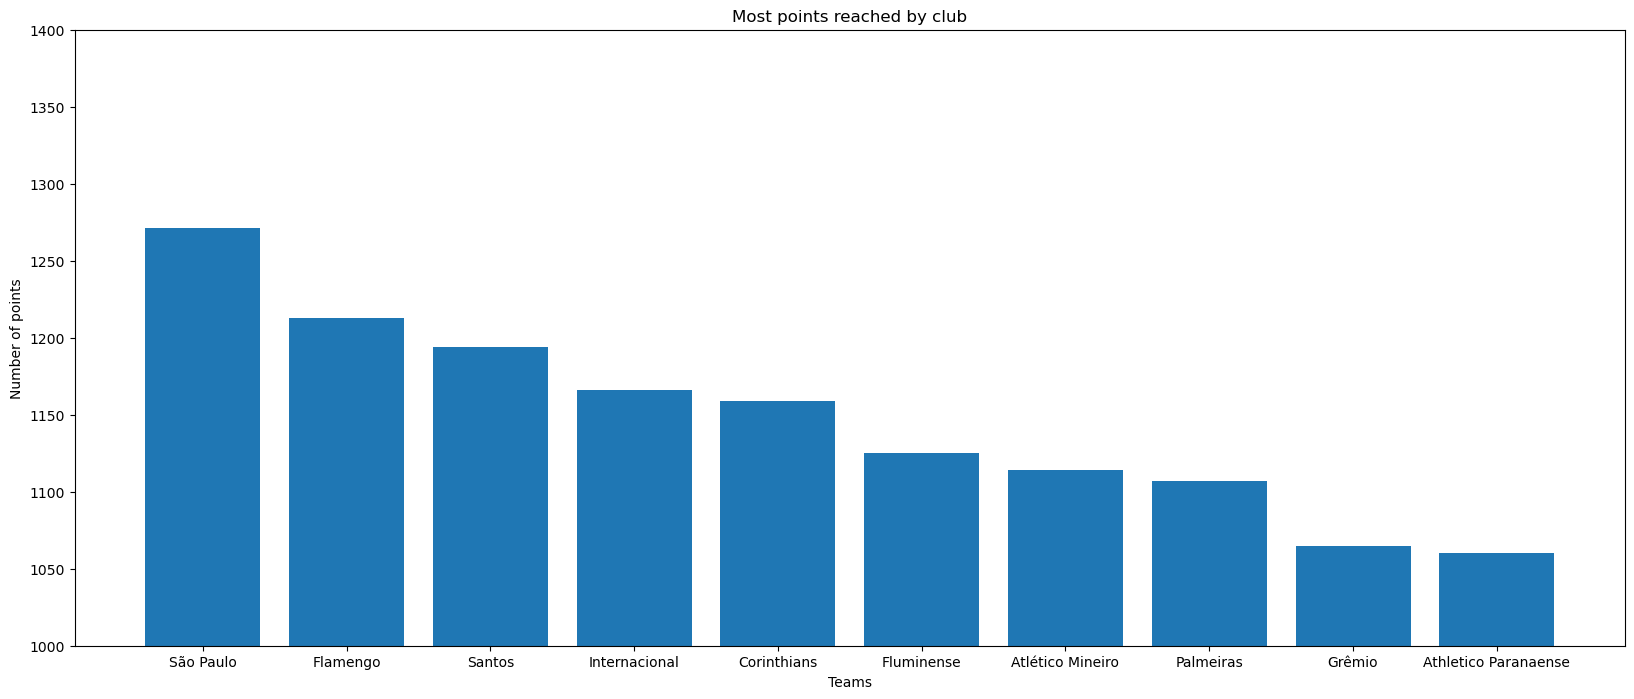

In [5]:
# create a simple bar char to explore points obtained
totalPoints = dataset.groupby("team")["points"].sum().reset_index().sort_values(by="points",ascending=False)
plt.figure(figsize=(20,8))
plt.bar(totalPoints.team[:10], totalPoints.points[:10])
plt.ylim(1000,1400)
plt.ylabel("Number of points")
plt.xlabel("Teams")
plt.title("Most points reached by club")
plt.show()

Sao Paulo is the team wich most points have made, if it is considered all the points in the Brasielirao era. The graphic is very consistent because Sao Paulo, Flamengo and Santos (the first three) are the only brazilian teams that have never been relegated to second division.

Lets see the rank of goals scored by team. Create a dataframe with the sum of goals grouped by team.

In [6]:
totalGoals = dataset.groupby("team")["goals_scored"].sum().reset_index().sort_values(by="goals_scored",ascending=False)

df = pd.DataFrame({ "Team": totalGoals.team,
                    "Goals": totalGoals.goals_scored})
df


,Team,Goals
38,Santos,1139
42,São Paulo,1123
18,Flamengo,1113
4,Atlético Mineiro,1079
19,Fluminense,1047
30,Palmeiras,1013
25,Internacional,996
2,Athletico Paranaense,982
15,Cruzeiro,978
22,Grêmio,956


Lets try seaborn library to create some visualizations.

[Text(0.5, 1.0, 'Goals scored by team')]

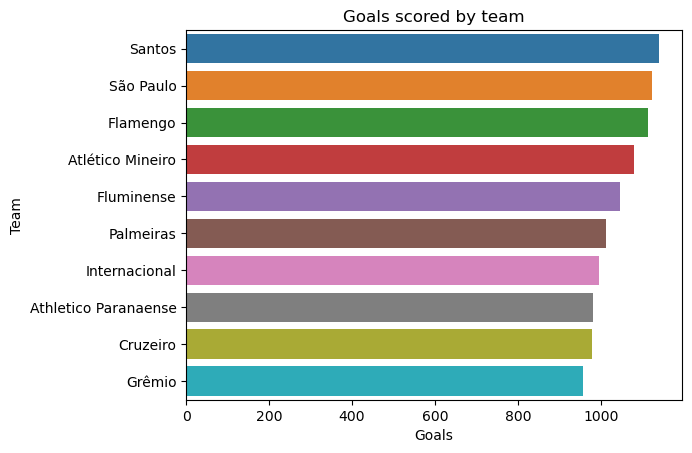

In [7]:

sns.barplot(x=df.Goals[:10] , y=df.Team[:10] , data=df).set(title='Goals scored by team')

The graphic seems to be consistent, because the same 3 three teams that have never been relegated lead this barplot too, but in a different order.

Now I want to see how many points got every champion each year since the start of Brasileirao in 2003. 
What team was the best champion?

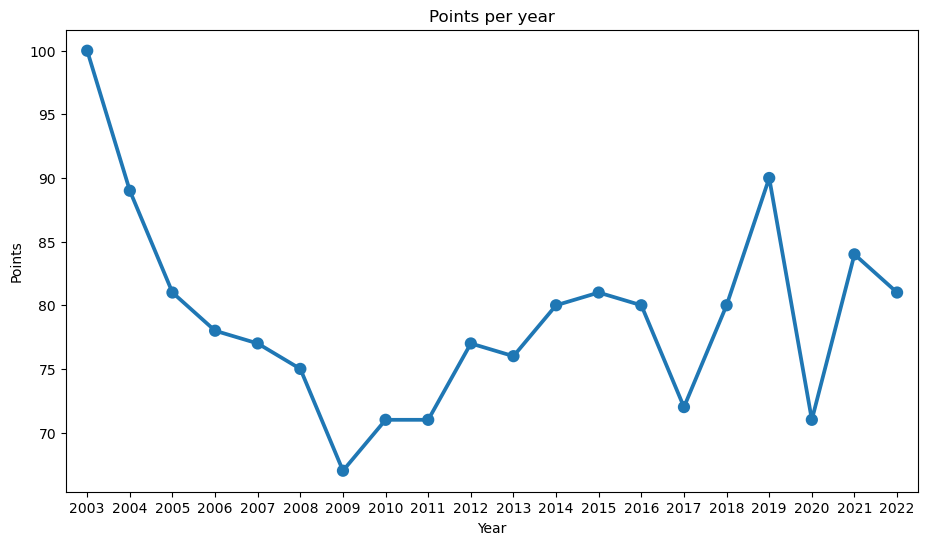

In [8]:
#Got just the champions, take number 1 each year
dataChampions = dataset.loc[dataset['position'] <2]
#print(dataChampions.to_string())

dataChampions2 = pd.DataFrame({
    'Year': dataChampions.year,
    'Name': dataChampions.team,
    'Points': dataChampions.points
})

dataChampions2

plt.figure(figsize=(11,6))
sns.pointplot(x=dataChampions2.Year, y=dataChampions2.Points)

plt.title('Points per year')
plt.show()



I see the champion with most points gained in Brasileirao era was Cruzeiro in 2003, in the first edition the team has reached the amazing amount of 103 points. Also there was more games than other recent editions. So it's impossible to confirm if it was the best champion ever.

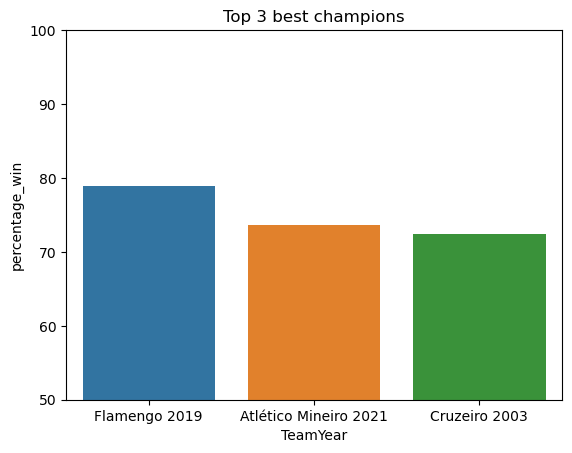

In [9]:
bestPercentage = dataset.groupby(['team','year'])["percentage_win"].sum().reset_index().sort_values(by="percentage_win",ascending=False)

df = pd.DataFrame(bestPercentage)
df = df[:3]

df['TeamYear'] = df['team']  + ' '+ df['year'].astype(str)
plt.title('Top 3 best champions')

sns.barplot(x='TeamYear',y=df.percentage_win,data=df)

plt.ylim(50,100)
plt.show()

Here I can see the best champions in Brasileirao era definitely was Flamengo squad of 2019. An insane squad leaded by Gabigol, De Arrascaeta, Vitinho, Everton Ribeiro. One of the best squads Brasielirao has ever had.

Now I want to see the goal difference from Flamengo through the Brasileirao era.

C:\Users\adminpc\AppData\Local\Temp\ipykernel_1772\2370481388.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flamengoDataset['year'] = flamengoDataset['year'].astype('category')


([<matplotlib.axis.XTick at 0x2026ab4d400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

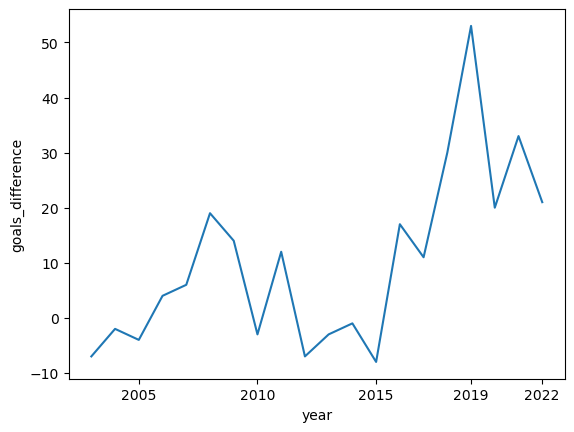

In [10]:
df2 = pd.DataFrame(dataset)
flamengoDataset = df2.loc[df2['team'] == 'Flamengo']

flamengoDataset['year'] = flamengoDataset['year'].astype('category')

sns.lineplot(data=flamengoDataset, x='year', y='goals_difference')

plt.xticks([2005, 2010, 2015, 2019 ,2022])

At this point I can see that the year Flamengo became the best champion ever in Brasileirao, it was also the year the team has reached the + highest goal difference ever in his entire history.

Finally I want to see how many championships the teams have reached along the years.

In [11]:
df = pd.DataFrame(dataset)
dfChampions = df.loc[df['position'] == 1]

dfChampions

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,percentage_win
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55,72.46
24,2004,1,Santos,89,46,27,8,11,103,58,45,64.49
48,2005,1,Corinthians,81,42,24,9,9,87,59,28,64.29
70,2006,1,São Paulo,78,38,22,12,4,66,32,34,68.42
90,2007,1,São Paulo,77,38,23,8,7,55,19,36,67.54
110,2008,1,São Paulo,75,38,21,12,5,66,36,30,65.79
130,2009,1,Flamengo,67,38,19,10,9,58,44,14,58.77
150,2010,1,Fluminense,71,38,20,11,7,62,36,26,62.28
170,2011,1,Corinthians,71,38,21,8,9,53,36,17,62.28
190,2012,1,Fluminense,77,38,22,11,5,61,33,28,67.54


Now it's time to count it.

C:\Users\adminpc\AppData\Local\Temp\ipykernel_1772\1574039256.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfChampions['qty'] = dfChampions['team'].apply(lambda x: qty[x])


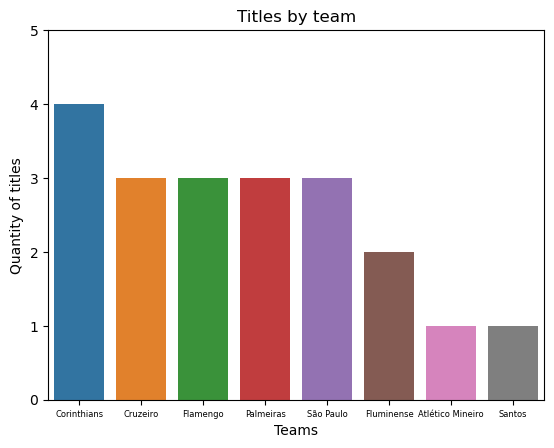

In [12]:
# try to count the championships of the teams in a new column by team
dfChampions2=dfChampions
qty = dfChampions['team'].value_counts()

# add the column
dfChampions['qty'] = dfChampions['team'].apply(lambda x: qty[x])

# keep the 2 columns
dfChamp = dfChampions2.loc[:, ['team', 'qty']]

# group by team and quantity and order
dfChamp = dfChamp.groupby('team')['qty'].count().reset_index().sort_values(by='qty',ascending=False)
#dfChamp

plt.title('Titles by team')
sns.barplot(x=dfChamp.team,y=dfChamp.qty,data=dfChamp)
plt.xticks(fontsize=6)

plt.ylabel("Quantity of titles")
plt.xlabel("Teams")
plt.ylim(0,5)
plt.show()


The results are consistent for what Brasileirao is. The most competitive soccer league in the world has his championships mostly equally divided. There is not a dominant team, but Corinthians is the team with most championships. Not too far are teams like Cruzeiro, Flamengo, Palmeiras and Sao Paulo with 3 titles.

Time to start with some machine learning techniques

In [13]:
import datetime
from statsmodels.stats.weightstats import DescrStatsW 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


I will create a new dataframe with the dataset information to work better with the data.

In [14]:
dataset.dtypes
dfDataset = pd.DataFrame(dataset)
dfDataset

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,percentage_win
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55,72.46
1,2003,2,Santos,87,46,25,12,9,93,60,33,63.04
2,2003,3,São Paulo,78,46,22,12,12,81,67,14,56.52
3,2003,4,São Caetano,74,46,19,14,13,53,37,16,53.62
4,2003,5,Coritiba,73,46,21,10,15,67,58,9,52.90
...,...,...,...,...,...,...,...,...,...,...,...,...
405,2022,16,Cuiabá,41,38,10,11,17,31,42,-11,35.96
406,2022,17,Ceará,37,38,7,16,15,34,41,-7,32.46
407,2022,18,Atlético Goianiense,36,38,8,12,18,39,57,-18,31.58
408,2022,19,Avaí,35,38,9,8,21,34,60,-26,30.70


Now I will check the dataset and confirm what is the dimension of information I will need to use

In [15]:
# Get the target what I want to get
y = dfDataset['position']
# Get the rest of the dataset without the target
x = dfDataset.drop(['position'],axis=1)
# Show the esc
print(f' x : {x.shape}')

 x : (410, 11)


I will create a new dataframe from the original one, but cutting some attributes that are not needed for the linear regression model.
For example Year and Games. I already know the year I have been working on is 2023, also I know that there will be 38 games in 
Brasileirao 2023 because there is a current rule.

In [16]:
# Current dataframe
dfDataset

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,percentage_win
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55,72.46
1,2003,2,Santos,87,46,25,12,9,93,60,33,63.04
2,2003,3,São Paulo,78,46,22,12,12,81,67,14,56.52
3,2003,4,São Caetano,74,46,19,14,13,53,37,16,53.62
4,2003,5,Coritiba,73,46,21,10,15,67,58,9,52.90
...,...,...,...,...,...,...,...,...,...,...,...,...
405,2022,16,Cuiabá,41,38,10,11,17,31,42,-11,35.96
406,2022,17,Ceará,37,38,7,16,15,34,41,-7,32.46
407,2022,18,Atlético Goianiense,36,38,8,12,18,39,57,-18,31.58
408,2022,19,Avaí,35,38,9,8,21,34,60,-26,30.70


Now I will cut the columns year and games, and use get_dummies function to replace team name for a number that will represent each team.
In a regression model you need all the variables in a numeric format.

I have tried to implement get_dummies() function to create a new column for each team, and put a 1 in each cell that represent the team row. But working on this way, dataframe change a lot and obviously I got a ridiculous amount of columns. Also R2 change got worse, so I decided to implement a dictionary. Maybe something I should have done before, but I don't faced a situation like this one, in which one I am forced to get a dictionary somehow.
I need a dictionary that link team with an identifier number. 

In [17]:
# copy the original dataset, and create a new one to work in the model
dfDatasetModel = dfDataset

# create new dictionary
team_ids = {}

# iterate through the rows of the dataFrame
for index, row in dfDatasetModel.iterrows():
    # check if the team already has an ID
    if row['team'] not in team_ids:
        # if not, I assign it one
        team_ids[row['team']] = len(team_ids) + 1
    # keep the ID in a new column of the dataframe
    dfDatasetModel.at[index, 'team_id'] = team_ids[row['team']]

# cast to int type, I don't want an id column in a float type
dfDatasetModel['team_id'] = dfDatasetModel['team_id'].astype(int)

pd.set_option('display.max_rows', 7)
(dfDatasetModel)

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,percentage_win,team_id
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55,72.46,1
1,2003,2,Santos,87,46,25,12,9,93,60,33,63.04,2
2,2003,3,São Paulo,78,46,22,12,12,81,67,14,56.52,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,2022,18,Atlético Goianiense,36,38,8,12,18,39,57,-18,31.58,38
408,2022,19,Avaí,35,38,9,8,21,34,60,-26,30.70,34
409,2022,20,Juventude,22,38,3,13,22,29,69,-40,19.30,18


In [18]:
dfDatasetModel

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,percentage_win,team_id
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55,72.46,1
1,2003,2,Santos,87,46,25,12,9,93,60,33,63.04,2
2,2003,3,São Paulo,78,46,22,12,12,81,67,14,56.52,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,2022,18,Atlético Goianiense,36,38,8,12,18,39,57,-18,31.58,38
408,2022,19,Avaí,35,38,9,8,21,34,60,-26,30.70,34
409,2022,20,Juventude,22,38,3,13,22,29,69,-40,19.30,18


In [19]:
# Try to see each team with its indicator
dfTeams = pd.DataFrame.from_dict(team_ids, orient='index', columns=['team_id'])
pd.set_option('display.max_rows', 7)
dfTeams

,team_id
Cruzeiro,1
Santos,2
São Paulo,3
...,...
Red Bull Bragantino,43
Sport Recife,44
Cuiabá,45


Now I know what ID Python assigned to each team through the all competitions.
It's known what teams will participate in the next 2023 Brasileirao, so I think the best way to map it, it's create a new xlsx file with the information.

I need give to the model what team will be participating in the next edition of the tournament, so this file will be very useful.

In [21]:
dfTeams2023 = pd.read_excel('teams2023.xlsx')

In [22]:
dfDataset = df[df['team'].isin(dfTeams2023['team'])]
dfDataset

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,percentage_win,team_id
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55,72.46,1
1,2003,2,Santos,87,46,25,12,9,93,60,33,63.04,2
2,2003,3,São Paulo,78,46,22,12,12,81,67,14,56.52,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2022,14,Red Bull Bragantino,44,38,11,11,16,49,59,-10,38.60,43
404,2022,15,Coritiba,42,38,12,6,20,39,60,-21,36.84,5
405,2022,16,Cuiabá,41,38,10,11,17,31,42,-11,35.96,45


In [23]:
pd.set_option('display.max_rows', 20)
dfDataset

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,percentage_win,team_id
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55,72.46,1
1,2003,2,Santos,87,46,25,12,9,93,60,33,63.04,2
2,2003,3,São Paulo,78,46,22,12,12,81,67,14,56.52,3
4,2003,5,Coritiba,73,46,21,10,15,67,58,9,52.90,5
5,2003,6,Internacional,72,46,20,10,16,59,57,2,52.17,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,2022,12,Santos,47,38,12,11,15,44,41,3,41.23,2
402,2022,13,Goiás,46,38,11,13,14,40,53,-13,40.35,9
403,2022,14,Red Bull Bragantino,44,38,11,11,16,49,59,-10,38.60,43
404,2022,15,Coritiba,42,38,12,6,20,39,60,-21,36.84,5


Now it's time to keep just the columns that will be neccesary for the predictions. I already know the information of the columns:    "Year", "team", "games". 
It will be: 
 
Year: 2023

team: not neccesary, I already have the "team_id"

games: 38

In [24]:
# just keep the columns needed
dfDatasetPredictor = dfDataset[['position','points', 'victories', 'draws', 'losses', 'goals_scored', 'goals_against', 'goals_difference', 'percentage_win', 'team_id']]

In [25]:
# information from all brasileirao editions that will be used for the predictions, all columns must match exactly with the new dataframe of Brasileirao 2023
dfDatasetPredictor

,position,points,victories,draws,losses,goals_scored,goals_against,goals_difference,percentage_win,team_id
0,1,100,31,7,8,102,47,55,72.46,1
1,2,87,25,12,9,93,60,33,63.04,2
2,3,78,22,12,12,81,67,14,56.52,3
4,5,73,21,10,15,67,58,9,52.90,5
5,6,72,20,10,16,59,57,2,52.17,6
...,...,...,...,...,...,...,...,...,...,...
401,12,47,12,11,15,44,41,3,41.23,2
402,13,46,11,13,14,40,53,-13,40.35,9
403,14,44,11,11,16,49,59,-10,38.60,43
404,15,42,12,6,20,39,60,-21,36.84,5


In [26]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dfDatasetPredictor[['points', 'victories', 'draws', 'losses', 'goals_scored', 'goals_against', 'goals_difference', 'percentage_win','team_id']], dfDataset['position'], test_size=0.2, random_state=42)

# create regressor object
reg = LinearRegression()

# train the model
reg.fit(X_train, y_train)

# evaluate the model
score = reg.score(X_test, y_test)

# Final R2
print("R^2 score:", score)


R^2 score: 0.9021042875040574


R^2 score: 0.9021042875040574 is an excellent coefficient. It means the model has a good performance and the data fits well.
90.21% of the variability of the results can be explained by the variables included in the model.
